Log best params: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.99      0.79      0.88       259
           1       0.71      0.99      0.83       137

    accuracy                           0.86       396
   macro avg       0.85      0.89      0.85       396
weighted avg       0.89      0.86      0.86       396



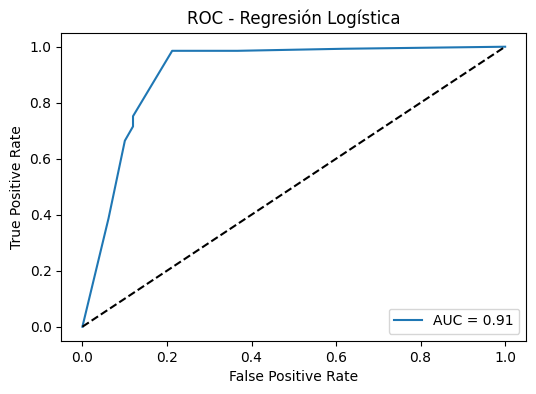

Tree best params: {'max_depth': 3, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.99      0.79      0.88       259
           1       0.71      0.99      0.83       137

    accuracy                           0.86       396
   macro avg       0.85      0.89      0.85       396
weighted avg       0.89      0.86      0.86       396



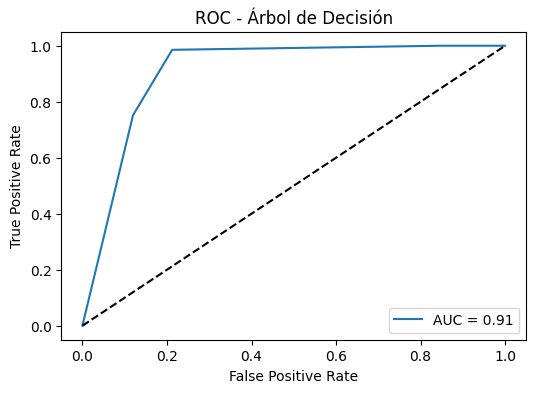

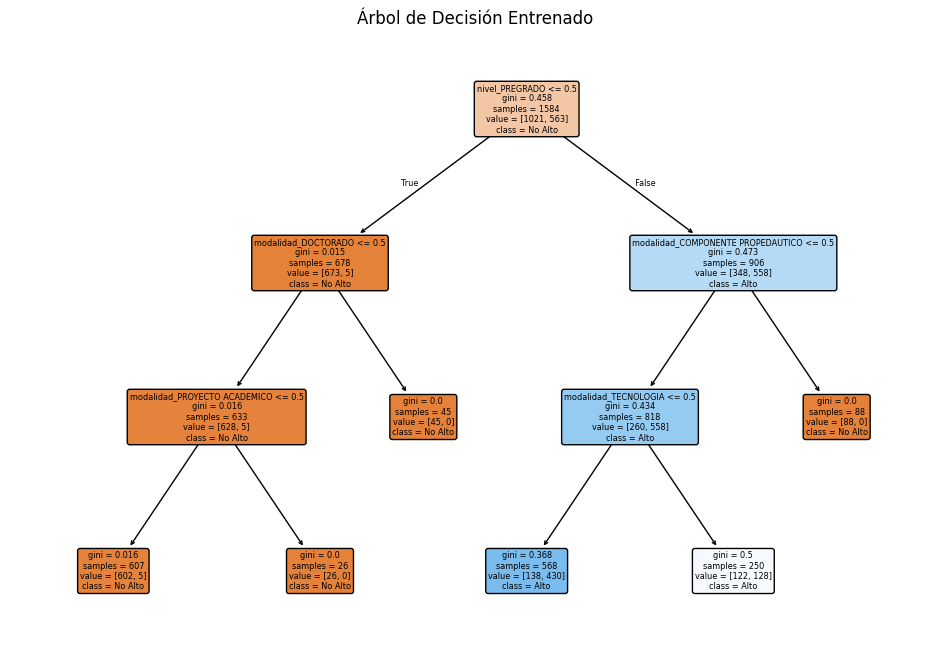

In [3]:
# 1. Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay

# 2. Carga de datos (evitando fsspec)
with open("C://Users//User//Downloads//programas_academicos.csv", encoding='latin1') as f:
    df = pd.read_csv(f)

# 3. Creación de variable objetivo
# Definimos 'alto_matriculado' como 1 si matriculados > mediana, 0 en caso contrario
df['alto_matriculado'] = (df['matriculados'] > df['matriculados'].median()).astype(int)

# 4. Preprocesamiento
df = df.dropna(subset=['nivel', 'modalidad', 'alto_matriculado'])
X_cat = df[['nivel', 'modalidad']]
y = df['alto_matriculado']

encoder = OneHotEncoder(drop='first', sparse_output=False)
X = encoder.fit_transform(X_cat)

# 5. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Regresión Logística con GridSearchCV
param_grid_log = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear'],
    'penalty': ['l2']
}
log = LogisticRegression(max_iter=1000)
grid_log = GridSearchCV(
    log, param_grid_log, cv=5, scoring='accuracy'
)
grid_log.fit(X_train, y_train)
print("Log best params:", grid_log.best_params_)
print(classification_report(y_test, grid_log.predict(X_test)))

# Curva ROC - Regresión Logística
probs_log = grid_log.predict_proba(X_test)[:,1]
fpr_l, tpr_l, _ = roc_curve(y_test, probs_log)
auc_l = roc_auc_score(y_test, probs_log)
plt.figure(figsize=(6,4))
plt.plot(fpr_l, tpr_l, label=f"AUC = {auc_l:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.title('ROC - Regresión Logística')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# 7. Árbol de Decisión con GridSearchCV
param_grid_tree = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}
tree = DecisionTreeClassifier(random_state=42)
grid_tree = GridSearchCV(
    tree, param_grid_tree, cv=5, scoring='accuracy'
)
grid_tree.fit(X_train, y_train)
print("Tree best params:", grid_tree.best_params_)
print(classification_report(y_test, grid_tree.predict(X_test)))

# Curva ROC - Árbol de Decisión
probs_t = grid_tree.predict_proba(X_test)[:,1]
fpr_t, tpr_t, _ = roc_curve(y_test, probs_t)
auc_t = roc_auc_score(y_test, probs_t)
plt.figure(figsize=(6,4))
plt.plot(fpr_t, tpr_t, label=f"AUC = {auc_t:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.title('ROC - Árbol de Decisión')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# 8. Visualización del Árbol Óptimo
plt.figure(figsize=(12,8))
plot_tree(
    grid_tree.best_estimator_,
    feature_names=encoder.get_feature_names_out(),
    class_names=['No Alto','Alto'],
    filled=True,
    rounded=True
)
plt.title('Árbol de Decisión Entrenado')
plt.show()
